Percentage of Charged Off Loans: 10.27%
Total amount paid before charge-off: $37,400,589.04
Total expected loss from charged-off loans: $69,998,888.12
remaining_term
0.0       £277,964.30
1.0         £4,788.05
2.0        £28,684.32
3.0        £19,266.14
4.0        £50,385.43
5.0        £53,333.48
6.0       £146,397.00
7.0        £83,191.88
8.0       £178,689.91
9.0       £159,530.67
10.0      £263,842.34
11.0      £230,578.76
12.0      £192,078.86
13.0      £406,844.72
14.0      £492,385.73
15.0      £682,760.84
16.0      £878,837.42
17.0      £885,277.47
18.0      £959,582.26
19.0    £1,072,280.19
20.0    £1,056,511.21
21.0    £1,233,431.46
22.0    £1,118,114.20
23.0    £1,303,621.52
24.0    £1,469,890.21
25.0    £1,338,766.44
26.0    £1,427,466.34
27.0    £1,276,631.53
28.0    £1,609,715.67
29.0    £2,013,674.09
30.0    £1,669,962.62
31.0    £1,253,028.03
32.0    £1,194,400.51
33.0    £1,154,919.35
34.0    £1,005,357.38
35.0      £917,917.18
36.0      £572,111.39
37.0      £886,819.5

/var/folders/qd/n_spt9vn51v0dmq660hf1qmm0000gn/T/ipykernel_56961/843169218.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_charged_off['expected_loss'] = (loans_charged_off['instalment'] * loans_charged_off['term_months']) - loans_charged_off['total_payment']
/var/folders/qd/n_spt9vn51v0dmq660hf1qmm0000gn/T/ipykernel_56961/843169218.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_charged_off['remaining_term'] = loans_charged_off['term_months'] - (
/var/folders/qd/n_spt9vn51v0dmq660hf1q

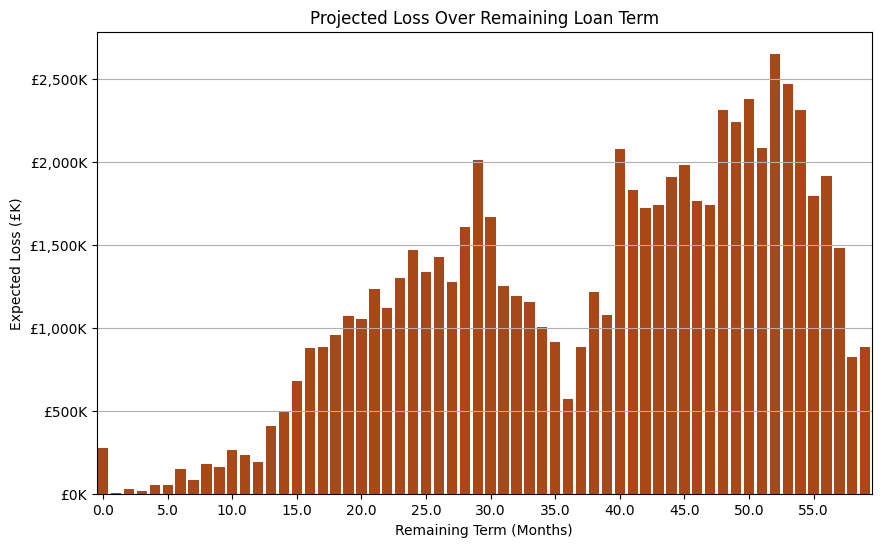

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

df = pd.read_csv('financial_loan_data.csv')

# identifying charged off loans
loans_charged_off = df[df['loan_status'] == 'Charged Off']

# calculating and printing percentage of charged off loans
charged_off_pct = (len(loans_charged_off) / len(df)) * 100
print(f'Percentage of Charged Off Loans: {charged_off_pct:.2f}%')

# calculating amound paid before charge off
total_paid_charged_off_loans = loans_charged_off['total_payment'].sum()
print(f"Total amount paid before charge-off: ${total_paid_charged_off_loans:,.2f}")

# formula for expected loss on charged off loans
loans_charged_off['expected_loss'] = (loans_charged_off['instalment'] * loans_charged_off['term_months']) - loans_charged_off['total_payment']

# calculating & printing total expected loss
total_loss = loans_charged_off['expected_loss'].sum()
print(f"Total expected loss from charged-off loans: ${total_loss:,.2f}")

# calculating remaining term for charged off loans since last payment date & making sure no negative values
loans_charged_off['remaining_term'] = loans_charged_off['term_months'] - (
    (pd.to_datetime(loans_charged_off['last_payment_date']) - pd.to_datetime(loans_charged_off['issue_date'])).dt.days // 30
)
loans_charged_off['remaining_term'] = loans_charged_off['remaining_term'].clip(lower=0)


# aggregating losses by remaining months  / converting to amounts to make sense to me
loss_over_time = loans_charged_off.groupby('remaining_term')['expected_loss'].sum().sort_index()
loss_over_time_amount = loss_over_time.apply(lambda x: f"£{x:,.2f}")
print(loss_over_time_amount)

# visualizing projected loss over months

plt.figure(figsize=(10, 6))
sns.barplot(x=loss_over_time.index, y=loss_over_time.values, color='#C04000')

plt.xlabel('Remaining Term (Months)')
plt.ylabel('Expected Loss (£K)')
plt.title('Projected Loss Over Remaining Loan Term')

# formatting y-axis to show values in thousands (K)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'£{x/1000:,.0f}K'))
# shows only every 5 months on x axsis
plt.xticks(ticks=loss_over_time.index[::5])

plt.grid(axis='y')
plt.show()

